In [1]:
import pyhf

In [2]:
import numpy as np

In [3]:
def get_parameter_names(model):
    labels = []
    for parname in model.config.par_order:
        for i_par in range(model.config.param_set(parname).n_parameters):
            labels.append(
                f"{parname}[bin_{i_par}]"
                if model.config.param_set(parname).n_parameters > 1
                else parname
            )
    return labels

In [4]:
spec = {
    "channels": [
        {
            "name": "region_one",
            "samples": [
                {
                    "data": [200, 180, 200],
                    "modifiers": [
                        {"name": "scale_real", "type": "shapefactor", "data": None},
                        {"name": "dummy", "type": "normfactor", "data": None},
                    ],
                    "name": "real",
                },
                {
                    "data": [20, 20, 20],
                    "modifiers": [
                        {"name": "scale_fake", "type": "shapefactor", "data": None}
                    ],
                    "name": "fake",
                },
            ],
        },
        {
            "name": "region_two",
            "samples": [
                {
                    "data": [210, 170, 210],
                    "modifiers": [
                        {"name": "scale_real", "type": "shapefactor", "data": None},
                    ],
                    "name": "real",
                },
                {
                    "data": [25, 25, 25],
                    "modifiers": [
                        {"name": "scale_fake", "type": "shapefactor", "data": None}
                    ],
                    "name": "fake",
                },
            ],
        },
    ],
    "measurements": [
        {
            "config": {
                "parameters": [{"name": "dummy", "fixed": True}],
                "poi": "dummy",
            },
            "name": "shapefactor example",
        }
    ],
    "observations": [
        {"data": [250, 210, 230], "name": "region_one"},
        {"data": [265, 215, 245], "name": "region_two"},
    ],
    "version": "1.0.0",
}

In [5]:
ws = pyhf.Workspace(spec)

In [6]:
model = ws.model()

In [7]:
data = ws.data(model)

In [8]:
fit_results = pyhf.infer.mle.fit(data,model)

In [9]:
get_parameter_names(model)

['scale_real[bin_0]',
 'scale_real[bin_1]',
 'scale_real[bin_2]',
 'dummy',
 'scale_fake[bin_0]',
 'scale_fake[bin_1]',
 'scale_fake[bin_2]']

In [11]:
SF_real = []
SF_fake = []

for i,label in enumerate(get_parameter_names(model)):
    print(f"{label}: {fit_results[i]}")

    if label.startswith("scale_real"):
        SF_real.append(fit_results[i])
    elif label.startswith("scale_fake"):
        SF_fake.append(fit_results[i])


scale_real[bin_0]: 1.1876992708969907
scale_real[bin_1]: 0.8637001273834927
scale_real[bin_2]: 1.0624014477338795
dummy: 1.0
scale_fake[bin_0]: 0.6231498756305794
scale_fake[bin_1]: 2.726765428630357
scale_fake[bin_2]: 0.8758828438837809


In [13]:
print("Real template SF: ",SF_real)
print("Fake template SF: ",SF_fake)

Real template SF:  [1.1876992708969907, 0.8637001273834927, 1.0624014477338795]
Fake template SF:  [0.6231498756305794, 2.726765428630357, 0.8758828438837809]


In [14]:
import matplotlib.pyplot as plt

In [15]:
real_y_region1 = np.array([200,180,200])
fake_y_region1 = np.array([20,20,20])

real_y_region2 = np.array([210, 170, 210])
fake_y_region2 = np.array([25,25,25])

data_y_region1 = np.array([250, 210, 230])
data_y_region2 = np.array([265, 215, 245])

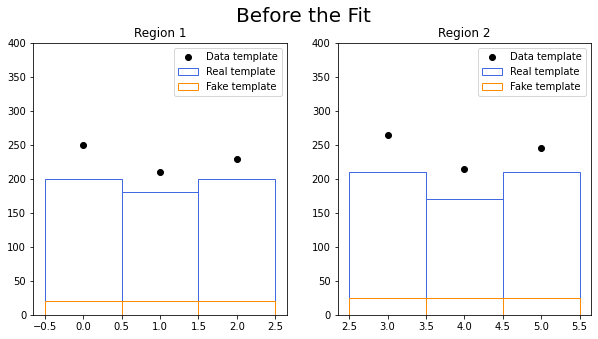

In [39]:
fig,ax =  plt.subplots(1,2,figsize=(10,5))
plt.suptitle("Before the Fit",fontsize=20)
bins = np.arange(len(data_y_region1))
width= 1.

ax[0].bar(bins,real_y_region1,width,label="Real template",edgecolor='royalblue',fill=False)
ax[0].bar(bins,fake_y_region1,width,label="Fake template",edgecolor='darkorange',fill=False)
ax[0].scatter(bins,data_y_region1,color='black',label='Data template')
ax[0].set_ylim(0,400)
ax[0].set_title('Region 1')
ax[0].legend()
     
bins = bins+3
ax[1].bar(bins,real_y_region2,width,label="Real template",edgecolor='royalblue',fill=False)
ax[1].bar(bins,fake_y_region2,width,label="Fake template",edgecolor='darkorange',fill=False)
ax[1].set_ylim(0,400)
ax[1].scatter(bins,data_y_region2,color='black',label='Data template')
ax[1].set_title('Region 2')
ax[1].legend()

In [27]:
data_fitted_region_1 = real_y_region1 * SF_real +  fake_y_region1 * SF_fake
data_fitted_region_2 = real_y_region2 * SF_real +  fake_y_region2 * SF_fake

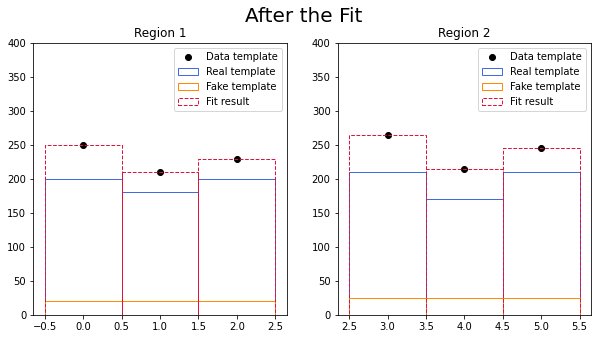

In [40]:
fig,ax =  plt.subplots(1,2,figsize=(10,5))
plt.suptitle("After the Fit",fontsize=20)
bins = np.arange(len(data_y_region1))
width= 1.

ax[0].bar(bins,real_y_region1,width,label="Real template",edgecolor='royalblue',fill=False)
ax[0].bar(bins,fake_y_region1,width,label="Fake template",edgecolor='darkorange',fill=False)
ax[0].bar(bins,data_fitted_region_1,width,label="Fit result",edgecolor='crimson',fill=False,linestyle='--')
ax[0].scatter(bins,data_y_region1,color='black',label='Data template')
ax[0].set_ylim(0,400)
ax[0].set_title('Region 1')
ax[0].legend()

bins = bins+3
ax[1].bar(bins,real_y_region2,width,label="Real template",edgecolor='royalblue',fill=False)
ax[1].bar(bins,fake_y_region2,width,label="Fake template",edgecolor='darkorange',fill=False)
ax[1].bar(bins,data_fitted_region_2,width,label="Fit result",edgecolor='crimson',fill=False,linestyle='--')
ax[1].set_ylim(0,400)
ax[1].scatter(bins,data_y_region2,color='black',label='Data template')
ax[1].set_title('Region 2')
ax[1].legend()

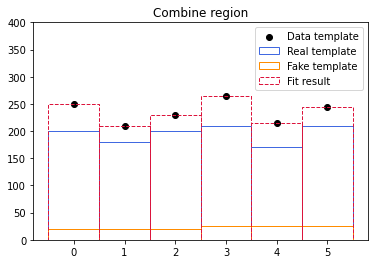

In [43]:
fig,ax =  plt.subplots()
bins = np.arange(len(data_y_region1))
width= 1.

combine_real_y = np.concatenate((real_y_region1,real_y_region2),axis=0)
combine_fake_y = np.concatenate((fake_y_region1,fake_y_region2),axis=0)
combine_data_y = np.concatenate((data_y_region1,data_y_region2),axis=0)
combine_data_fitted_y = np.concatenate((data_fitted_region_1,data_fitted_region_2),axis=0)

bins = np.arange(len(combine_data_y))

ax.bar(bins,combine_real_y,width,label="Real template",edgecolor='royalblue',fill=False)
ax.bar(bins,combine_fake_y,width,label="Fake template",edgecolor='darkorange',fill=False)
ax.bar(bins,combine_data_fitted_y,width,label="Fit result",edgecolor='crimson',fill=False,linestyle='--')
ax.scatter(bins,combine_data_y,color='black',label='Data template')
ax.set_ylim(0,400)
ax.set_title('Combine region')
ax.legend()